In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import sklearn as skt
from sklearn.preprocessing import OneHotEncoder #not used yet, learn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Model
from keras.initializers import glorot_uniform
from keras.utils import layer_utils
import keras.backend as K
from keras.optimizers import SGD
from keras.utils import np_utils
K.set_image_data_format('channels_last')
from keras.datasets import fashion_mnist
from imutils import build_montages # for visualization
%matplotlib inline

In [0]:
def data_loader():
  # load data 
  print("[INFO] data loading...")
  fashion_mnist = keras.datasets.fashion_mnist
  ((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()
  _, height, width= X_train.shape
  depth = 1 # fashion mnsit is greyscale 
  #channelDim = -1 
  nb_classes = len(np.unique(y_train))
  # preprocess data 
  X_train = X_train.reshape((X_train.shape[0], height, width, depth))
  X_test = X_test.reshape((X_test.shape[0], height, width, depth))
  
  # normalization 
  X_train = X_train.astype("float32") / 255.0 
  X_test = X_test.astype("float32") / 255.0 
  
  # one hot encoding
  y_train = np_utils.to_categorical(y_train, nb_classes)
  y_test = np_utils.to_categorical(y_test, nb_classes)

  X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
  labelNames = ["top", "trousers", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"]

  return

def model_keras(input_shape, classes, BN):
  X_input = Input(input_shape)
  
  X = Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X_input)
  if BN == True:  
    X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = 48, kernel_size = (3, 3), strides = (1,1), padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
  if BN == True:  
    X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), strides=(2, 2))(X)

  X = Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
  if BN == True:  
    X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
  if BN == True:  
    X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), strides=(2, 2))(X)

  X = Flatten()(X)
  X = Dense(256, activation='relu', kernel_initializer = glorot_uniform(seed=0), use_bias=False)(X)
  if BN == True:  
    X = BatchNormalization()(X)
  X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)

  model = Model(inputs = X_input, outputs = X)

  return model

def train_model(optimizer,BN,base):
  print("[INFO] compiling model...")
  if BN == True:
    model_BN = model_keras(input_shape=(28, 28, 1), classes=10, BN=True)
    model_BN.summary()
    model_BN.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print("[INFO] training model...")
    trained_model_BN = model_BN.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size= mini_batch_size, epochs=nb_epochs)
  if base == True:
    model_base = model_keras(input_shape=(28, 28, 1), classes=10, BN=False)
    model_base.summary()
    model_base.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print("[INFO] training model...")
    trained_model_base = model_base.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size= mini_batch_size, epochs=nb_epochs)
  return

In [207]:
optimizer='adam'

#optimizer = SGD(learning_rate=0.1, momentum = 0.9, decay = 1/np.exp(10))

mini_batch_size = 256            # change, small to begin 
nb_epochs = 10                   # change, small to begin 

data_loader()
base = True
BN = True

train_model(optimizer,BN,base)

#models.save_model(model, filepath, overwrite=True, include_optimizer=True, save_format=None, signatures=None, options=None)
#models.save_model(model, filepath, overwrite=True, include_optimizer=True, save_format=None, signatures=None, options=None)

[INFO] data loading...
[INFO] compiling model...
Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_134 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
activation_213 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 26, 26, 48)        13872     
_________________________________________________________________
batch_normalization_135 (Bat (None, 26, 26, 48)        192       
_________________________________________________________________
activatio

Base model
10000/10000 [==============================] - 6s 592us/step
Loss = 0.243783204382658
Test Accuracy = 0.9133999943733215
[INFO] evaluating network...
Base model
              precision    recall  f1-score   support

         top       0.88      0.84      0.86      1000
    trousers       1.00      0.98      0.99      1000
    pullover       0.84      0.89      0.87      1000
       dress       0.89      0.92      0.91      1000
        coat       0.85      0.85      0.85      1000
      sandal       0.98      0.98      0.98      1000
       shirt       0.77      0.74      0.76      1000
    sneakers       0.96      0.97      0.97      1000
         bag       0.98      0.98      0.98      1000
  ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



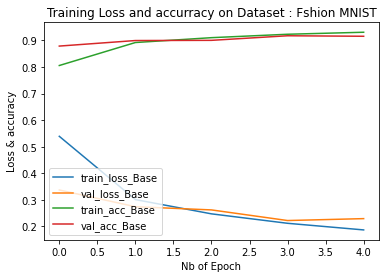

In [225]:
print("Base model")
preds = model_base.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
 
# make predictions on the test set 
predictions_base = model_base.predict(X_test)

# classification report
print("[INFO] evaluating network...")
print("Base model")
print(classification_report(y_test.argmax(axis=1), predictions_base.argmax(axis=1), target_names = labelNames))

# ploting results
plt.figure()
#Base
plt.plot(np.arange(0, len(trained_model_base.history["loss"])), trained_model_base.history["loss"], label="train_loss_Base")
plt.plot(np.arange(0, len(trained_model_base.history["val_loss"])), trained_model_base.history["val_loss"], label="val_loss_Base")
plt.plot(np.arange(0, len(trained_model_base.history["accuracy"])), trained_model_base.history["accuracy"], label="train_acc_Base")
plt.plot(np.arange(0, len(trained_model_base.history["val_accuracy"])), trained_model_base.history["val_accuracy"], label="val_acc_Base")
plt.title("Training Loss and accurracy on Dataset : Fshion MNIST")
plt.xlabel("Nb of Epoch")
plt.ylabel("Loss & accuracy")
plt.legend(loc="lower left")



BN model
10000/10000 [==============================] - 8s 835us/step
Loss = 0.27714633579850195
Test Accuracy = 0.9041000008583069
[INFO] evaluating network...
BN model
              precision    recall  f1-score   support

         top       0.85      0.88      0.87      1000
    trousers       0.99      0.98      0.99      1000
    pullover       0.86      0.87      0.87      1000
       dress       0.94      0.89      0.91      1000
        coat       0.74      0.96      0.83      1000
      sandal       0.97      1.00      0.98      1000
       shirt       0.84      0.57      0.68      1000
    sneakers       0.98      0.92      0.95      1000
         bag       0.96      0.99      0.97      1000
  ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



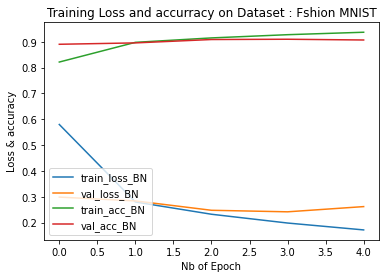

In [223]:

#BN
print("BN model")
preds = model_BN.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
 
predictions_BN = model_BN.predict(X_test)
print("[INFO] evaluating network...")
print("BN model")
print(classification_report(y_test.argmax(axis=1), predictions_BN.argmax(axis=1), target_names = labelNames))
plt.figure()
plt.plot(np.arange(0, len(trained_model_BN.history["loss"])), trained_model_BN.history["loss"], label="train_loss_BN")
plt.plot(np.arange(0, len(trained_model_BN.history["val_loss"])), trained_model_BN.history["val_loss"], label="val_loss_BN")
plt.plot(np.arange(0, len(trained_model_BN.history["accuracy"])), trained_model_BN.history["accuracy"], label="train_acc_BN")
plt.plot(np.arange(0, len(trained_model_BN.history["val_accuracy"])), trained_model_BN.history["val_accuracy"], label="val_acc_BN")

plt.title("Training Loss and accurracy on Dataset : Fshion MNIST")
plt.xlabel("Nb of Epoch")
plt.ylabel("Loss & accuracy")
plt.legend(loc="lower left")

In [222]:
print (len(trained_model_BN.history["loss"]))


5
